In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import numpy as np

In [2]:
cars = pd.read_csv('car_prices.csv', on_bad_lines = 'skip').sample(40000)

In [3]:
cars.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
238435,2013,Ford,Escape,S,SUV,automatic,1fmcu0f70dud17454,tx,4.3,44466.0,—,black,"ford motor credit company,llc",13300,12400,Thu Feb 05 2015 02:30:00 GMT-0800 (PST)
498020,2014,Ford,Fusion,SE,sedan,automatic,3fa6p0h77er277684,fl,3.9,37231.0,blue,beige,lease plan/arlington heights ford,12800,12200,Wed Jun 03 2015 08:10:00 GMT-0700 (PDT)
229774,2007,Chrysler,Aspen,Limited,SUV,automatic,1a8hw58p77f511298,mi,1.9,139926.0,blue,gray,credit acceptance corp/vrs/southfield,6825,5800,Thu Feb 05 2015 01:30:00 GMT-0800 (PST)
396504,2008,BMW,5 Series,528xi,Sedan,NaN,wbanv13548cz54584,pa,2.8,51031.0,gray,black,bmw of sterling,15050,12700,Fri Mar 06 2015 01:00:00 GMT-0800 (PST)
352433,2012,Toyota,Tundra,Limited FFV,CrewMax Cab,automatic,5tfhw5f18cx233781,nc,4.8,41139.0,silver,gray,primeritus remarketing/jt automart 2,33600,34500,Mon Mar 02 2015 01:30:00 GMT-0800 (PST)


In [4]:
cars.dtypes

year              int64
make             object
model            object
trim             object
body             object
transmission     object
vin              object
state            object
condition       float64
odometer        float64
color            object
interior         object
seller           object
mmr               int64
sellingprice      int64
saledate         object
dtype: object

In [5]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40000 entries, 238435 to 469252
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          40000 non-null  int64  
 1   make          39298 non-null  object 
 2   model         39293 non-null  object 
 3   trim          39276 non-null  object 
 4   body          39072 non-null  object 
 5   transmission  35256 non-null  object 
 6   vin           40000 non-null  object 
 7   state         40000 non-null  object 
 8   condition     39124 non-null  float64
 9   odometer      39992 non-null  float64
 10  color         39946 non-null  object 
 11  interior      39946 non-null  object 
 12  seller        40000 non-null  object 
 13  mmr           40000 non-null  int64  
 14  sellingprice  40000 non-null  int64  
 15  saledate      40000 non-null  object 
dtypes: float64(2), int64(3), object(11)
memory usage: 5.2+ MB


In [6]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40000 entries, 238435 to 469252
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          40000 non-null  int64  
 1   make          39298 non-null  object 
 2   model         39293 non-null  object 
 3   trim          39276 non-null  object 
 4   body          39072 non-null  object 
 5   transmission  35256 non-null  object 
 6   vin           40000 non-null  object 
 7   state         40000 non-null  object 
 8   condition     39124 non-null  float64
 9   odometer      39992 non-null  float64
 10  color         39946 non-null  object 
 11  interior      39946 non-null  object 
 12  seller        40000 non-null  object 
 13  mmr           40000 non-null  int64  
 14  sellingprice  40000 non-null  int64  
 15  saledate      40000 non-null  object 
dtypes: float64(2), int64(3), object(11)
memory usage: 5.2+ MB


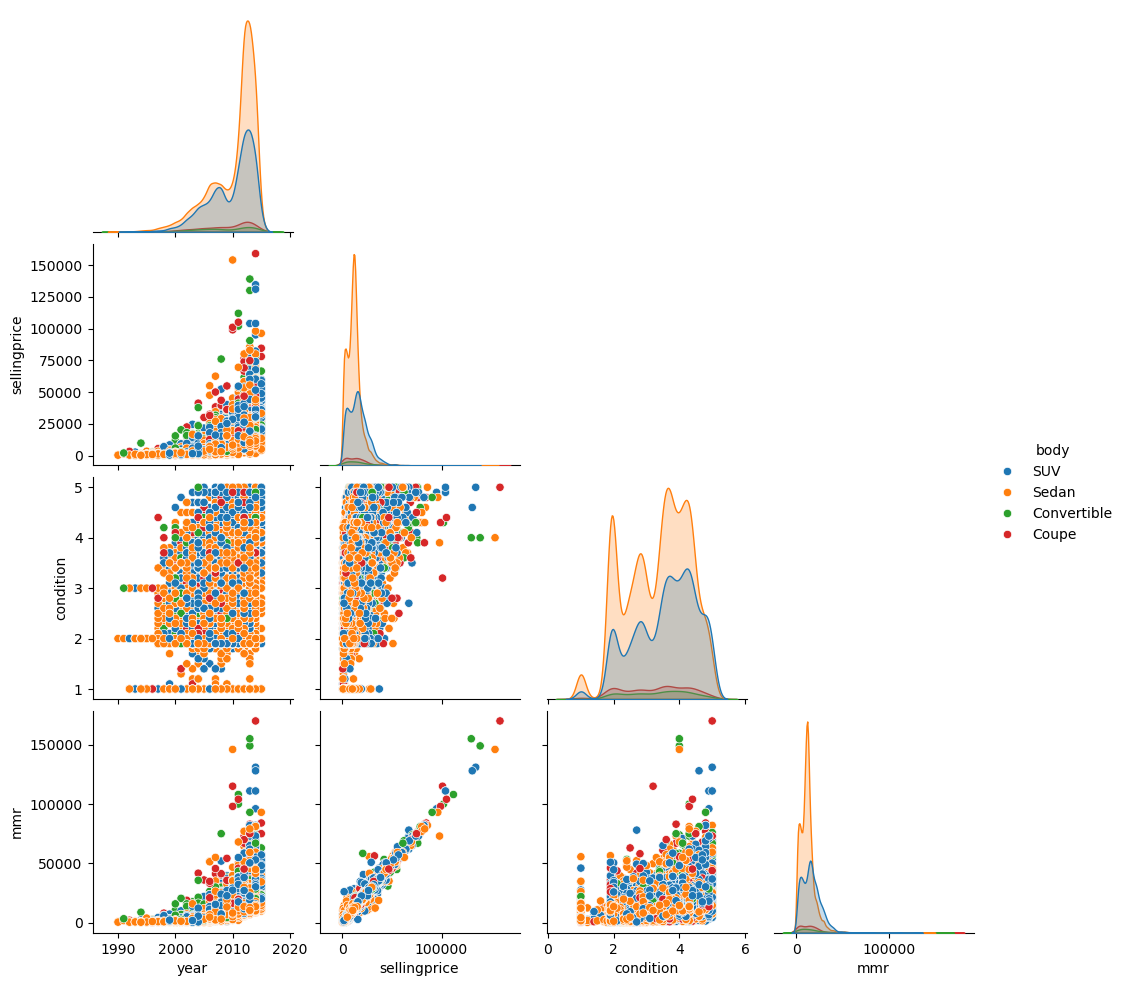

In [7]:
# find general relation between numerical variables by body

temp = cars[cars['body'].isin(['SUV', 'Sedan', 'Convertible', 'Coupe'])]
sns.pairplot(data = temp, vars = ['year', 'sellingprice', 'condition', 'mmr'], corner = True, hue = 'body')

<Axes: >

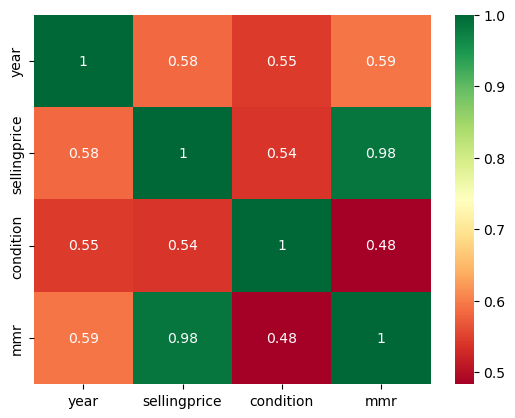

In [8]:
# find correlation between numerical variables

temp_matrix = cars[['year', 'sellingprice', 'condition', 'mmr']].corr()
sns.heatmap(data = temp_matrix, annot = True, cmap = 'RdYlGn')

(0.0, 100000.0)

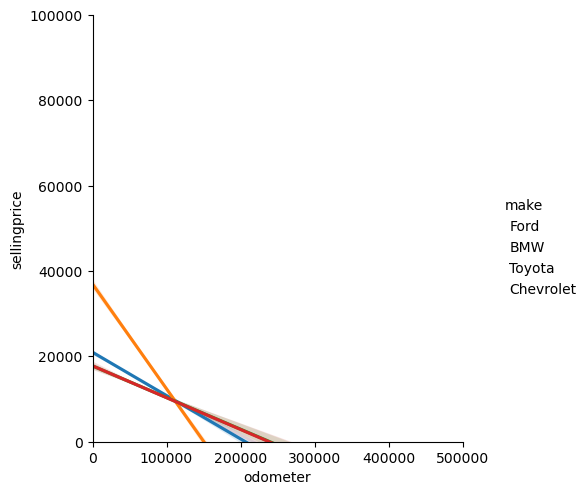

In [9]:
temp = cars[cars['make'].isin(['Ford', 'Chevrolet', 'Toyota', 'BMW'])]
sns.lmplot(x = 'odometer', y = 'sellingprice', data = temp, hue = 'make', scatter_kws={'alpha': 0.0})
plt.xlim(0, 500000)
plt.ylim(0, 100000)

Text(0.5, 0, 'condition')

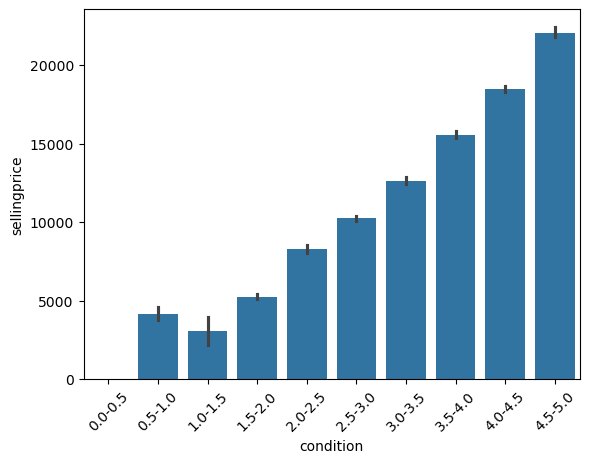

In [10]:
temp = cars[['sellingprice', 'condition']].copy()
labels = ['0.0-0.5', '0.5-1.0', '1.0-1.5', '1.5-2.0', '2.0-2.5', '2.5-3.0', '3.0-3.5', '3.5-4.0', '4.0-4.5', '4.5-5.0']
temp['cond_bin'] = pd.cut(temp['condition'], bins=np.arange(0.0, 5.1, 0.5))
sns.barplot(x = 'cond_bin', y = 'sellingprice', data = temp)
plt.xticks(ticks=range(len(labels)), labels=labels)
plt.xticks(rotation=45)
plt.xlabel('condition')

In [37]:
temp = cars[['make', 'sellingprice', 'condition']].copy()
top_10 = temp['make'].value_counts()[:10]
temp['cond_bin'] = pd.cut(temp['condition'], bins=np.arange(0.0, 5.1, 0.5))
pivot = temp.pivot_table(index = 'make', columns = 'cond_bin', values = 'sellingprice', observed = True, aggfunc = 'mean').loc[top_10.index]
pivot

cond_bin,"(0.5, 1.0]","(1.0, 1.5]","(1.5, 2.0]","(2.0, 2.5]","(2.5, 3.0]","(3.0, 3.5]","(3.5, 4.0]","(4.0, 4.5]","(4.5, 5.0]"
make,,,,,,,,,
Ford,3247.635135,4233.333333,5405.555556,8607.166667,10743.136010,13731.774436,15610.631298,17891.644164,20990.898630
Chevrolet,5082.692308,4066.666667,5474.560284,7434.654731,10196.359584,11328.634409,14645.303899,16464.572079,21613.343558
Nissan,5628.389831,1000.000000,5408.075221,8215.275168,9816.452652,11901.560440,12878.955357,14646.967857,16224.609948
Toyota,5418.902439,600.000000,5704.491713,8144.894161,9747.224537,12229.464720,14008.292818,16453.932143,19900.505051
Dodge,3648.214286,4311.111111,4845.081967,7579.148571,10058.926254,10623.833333,14113.586957,14629.803419,18329.020979
Honda,1106.818182,1100.000000,4718.902439,7967.357513,8790.100671,11805.514706,14088.785714,16937.751004,19902.403846
Hyundai,6448.888889,3100.000000,4805.312500,7942.000000,8987.142857,10420.645349,11672.432024,13606.527415,16881.952663
BMW,7740.000000,800.000000,6400.400000,11674.038462,11950.806452,16474.445055,21407.465278,27931.180556,36319.260204
Kia,5096.875000,NaN,4289.613861,6986.619718,7927.931034,9897.689922,11814.283654,13918.947205,15727.592593


<Axes: xlabel='cond_bin', ylabel='make'>

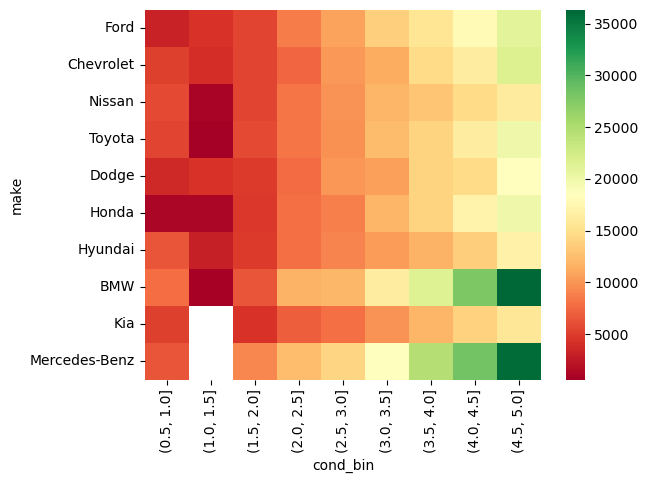

In [41]:
sns.heatmap(data = pivot, cmap = 'RdYlGn')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Ford'),
  Text(1, 0, 'BMW'),
  Text(2, 0, 'Toyota'),
  Text(3, 0, 'Dodge'),
  Text(4, 0, 'Chevrolet'),
  Text(5, 0, 'Nissan'),
  Text(6, 0, 'Honda'),
  Text(7, 0, 'Kia'),
  Text(8, 0, 'Mercedes-Benz'),
  Text(9, 0, 'Hyundai')])

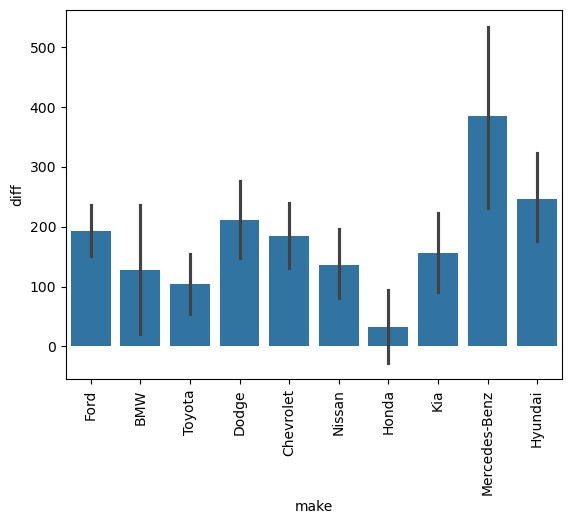

In [45]:
temp = cars[['make', 'mmr', 'sellingprice']].copy()
temp = temp[temp['make'].isin(top_10.index)]
temp['diff'] = temp['mmr'] - temp['sellingprice']
sns.barplot(x = 'make', y = 'diff', data = temp)
plt.xticks(rotation=90)